<a href="https://colab.research.google.com/github/soniapetrini/macro_project/blob/main/Final_Edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Gas Pricing Mechanism in Europe

## **Data Loading**

In [3]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!git clone https://github.com/Serafina-Z/test.git
path = '/content/'
%cd test

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: destination path 'test' already exists and is not an empty directory.
/content/test


In [102]:
 #!git pull

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/Serafina-Z/test
   f4dffb3..67498df  main       -> origin/main
Updating f4dffb3..67498df
Fast-forward
 eurusd.csv | 1804 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 1804 insertions(+)
 create mode 100644 eurusd.csv


# **Price Data**

In [4]:
brent = pd.read_csv("/content/test/brent_oil_all.csv")

In [5]:
brent['month']= pd.to_datetime(brent['Date']).dt.to_period("M")

In [6]:
brent = brent.groupby('month').mean()

In [7]:
brent

,Open,High,Low,Close,Volume,Dividends,Stock Splits
month,,,,,,,
2007-07,75.775000,76.850000,75.555000,76.395000,3044.000000,0.0,0.0
2007-08,71.391304,72.037826,70.489130,71.258696,4436.173913,0.0,0.0
2007-09,76.680526,77.599474,76.128947,77.135263,3265.368421,0.0,0.0
2007-10,81.946522,82.999130,81.205652,82.456957,3216.260870,0.0,0.0
2007-11,92.202500,93.004000,90.880500,91.876000,2011.700000,0.0,0.0
...,...,...,...,...,...,...,...
2020-11,43.002105,44.049474,42.529474,43.478421,33261.000000,0.0,0.0
2020-12,49.883500,50.609500,49.309500,50.095000,25824.400000,0.0,0.0
2021-01,55.077895,55.982632,54.490526,55.351579,30851.842105,0.0,0.0


In [8]:
ttf = pd.read_csv('/content/test/TTF_Quandl.csv')

In [9]:
ttf['month'] = pd.to_datetime(ttf['Date']).dt.to_period("M")

In [10]:
ttf = ttf.groupby("month").mean()

In [11]:
import_price = pd.read_csv("/content/test/import_price_month.csv")

In [12]:
import_price['month'] = pd.to_datetime(import_price['month']).dt.to_period("M")

In [13]:
import_price.index = import_price['month']

In [14]:
coal = pd.read_csv('coal.csv')

In [15]:
coal['month'] = pd.to_datetime(coal['Date']).dt.to_period("M")

In [16]:
coal.index = coal['month']

In [103]:
exchange = pd.read_csv("/content/test/eurusd.csv")

In [106]:
exchange['month']= pd.to_datetime(exchange['Date']).dt.to_period("M")

In [107]:
exchange = exchange.groupby('month').mean()

In [108]:
exchange

,eurusd_close
month,
2014-02,1.365286
2014-03,1.382566
2014-04,1.380623
2014-05,1.374598
2014-06,1.359689
...,...
2020-10,1.176977
2020-11,1.182952
2020-12,1.216249


In [ ]:
data_p = pd.concat([ttf['Settle'], brent['Close'], import_price['import_price_gas'],coal['coal'],exchange['eurusd_close']], axis =1)
data_p.columns = ['ttf', 'brent', 'import_price_gas', 'coal_price', 'exchange_rate']

In [ ]:
data_p

,ttf,brent,import_price_gas,coal_price
month,,,,
1960-01,NaN,NaN,0.4048,NaN
1960-02,NaN,NaN,0.4048,NaN
1960-03,NaN,NaN,0.4048,NaN
1960-04,NaN,NaN,0.4048,NaN
1960-05,NaN,NaN,0.4048,NaN
...,...,...,...,...
2021-01,20.34480,55.351579,7.2683,68.392105
2021-02,17.36515,62.203158,6.1585,65.239474
2021-03,15.82600,66.341429,6.1271,NaN


# **Seasonal Data**

In [19]:
def country_name(a):
  if a == "BE":
    return "Belgium"
  if a == "BG":
    return "Bulgaria"
  if a == "CZ":
    return "Czechia"
  if a == "DK":
    return "Denmark"
  if a == "DE":
    return "Germany"
  if a == "EE":
    return "Estonia"
  if a == "IE":
    return "Ireland"
  if a == "EL":
    return "Greece"
  if a == "FR":
    return "France"
  if a == "ES":
    return "Spain"
  if a == "HR":
    return "Croatia"
  if a == "IT":
    return "Italy"
  if a == "LV":
    return "Latvia"
  if a == "LT":
    return "Lithuania"
  if a == "HU":
    return "Hungary"
  if a == "NL":
    return "Netherlands"
  if a == "AT":
    return "Austria"
  if a == "PL":
    return "Poland"
  if a == "PT":
    return "Portugal"
  if a == "RO":
    return "Romania"
  if a == "SI":
    return "Slovenia"
  if a == "SK":
    return "Slovakia"
  if a == "FI":
    return "Finland"
  if a == "SE":
    return "Sweden"
  if a == "UK":
    return "United Kingdom"
  if a == "TR":
    return "Turkey"
  else:
    return "Others"

In [128]:
def clean_mean(df):
  df['geo'] = df['geo'].apply(country_name) # select 26 countries
  df['month'] = pd.to_datetime(df['TIME_PERIOD']).dt.to_period("M")
  df = df[df['geo']!= 'Others']
  df = df.groupby("month").mean()
  df['month'] = df.index
  return df

In [129]:
def clean_sum(df):
  df['geo'] = df['geo'].apply(country_name) # select 26 countries
  df['month'] = pd.to_datetime(df['TIME_PERIOD']).dt.to_period("M")
  df = df[df['geo']!= 'Others']
  df = df.groupby("month").sum()
  df['month'] = df.index
  return df

## Heating Data

In [127]:
from dateutil.parser import parse
heating = pd.read_csv("/content/test/heating_degree.csv")

In [130]:
heating = clean_mean(heating)

In [131]:
heating.to_csv("heating.csv")

In [132]:
from dateutil.parser import parse
heating = pd.read_csv('heating.csv', parse_dates=['month'], index_col='month')

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add_heating = seasonal_decompose(heating['OBS_VALUE'], model='additive', extrapolate_trend='freq') # Additive Decomposition
des_heating = pd.DataFrame(heating.OBS_VALUE.values - result_add_heating.seasonal)

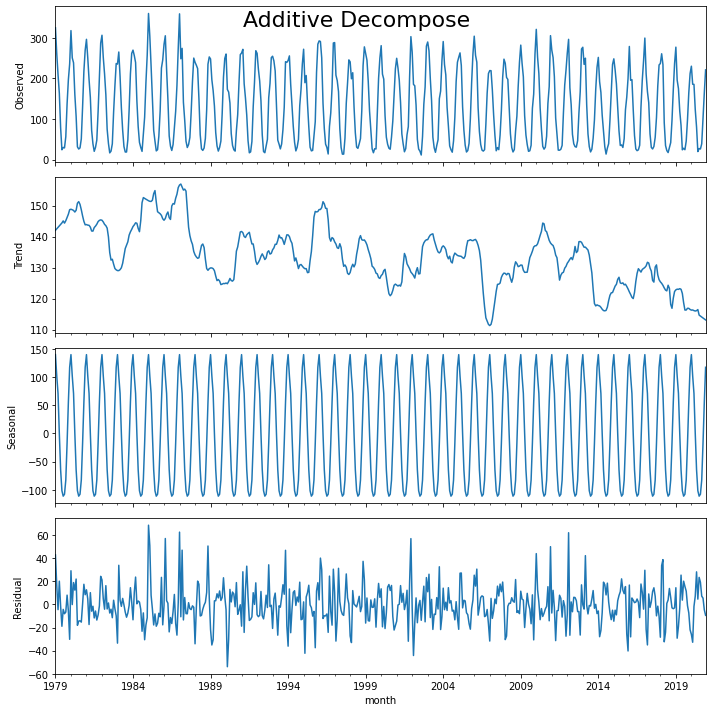

In [134]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,10)})
result_add_heating.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [135]:
des_heating = des_heating.reset_index()
des_heating['month'] = des_heating['month'].dt.to_period("M")

In [136]:
des_heating.columns = ['month', 'des_heating']
des_heating.index = des_heating['month']

In [137]:
heating.index = des_heating.index

In [138]:
des_heating['heating'] = heating['OBS_VALUE']

## Storage Data

In [141]:
storage = pd.read_csv("storage.csv")

In [142]:
storage = clean_sum(storage)

In [143]:
storage.to_csv("for_storage.csv")
storage = pd.read_csv('for_storage.csv', parse_dates=['month'], index_col='month')

In [144]:
result_add_storage = seasonal_decompose(storage['OBS_VALUE'], model='additive', extrapolate_trend='freq') # Additive Decomposition
des_storage = pd.DataFrame(storage.OBS_VALUE.values - result_add_storage.seasonal)

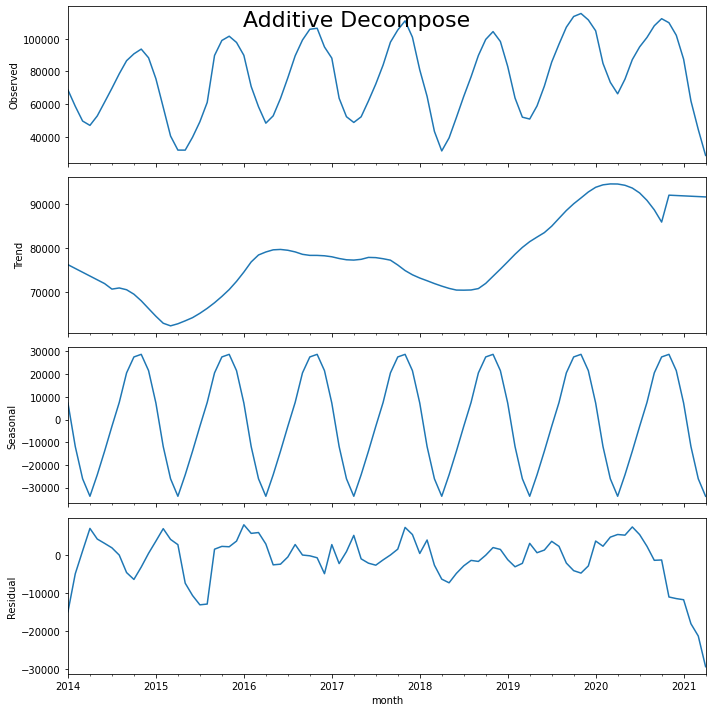

In [145]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_add_storage.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [146]:
des_storage = des_storage.reset_index()
des_storage['month'] = des_storage['month'].dt.to_period("M")
des_storage.columns = ['month', 'des_storage']

In [147]:
des_storage.index = des_storage['month']

In [148]:
storage.index = des_storage.index

In [149]:
des_storage['storage'] = storage['OBS_VALUE']

## Demand Data

In [40]:
c = pd.read_csv("/content/test/supply, transformation and consumption.csv")
e = pd.read_csv("/content/test/export.csv")
i = pd.read_csv("/content/test/import.csv")

In [41]:
c = clean_sum(c)
e = clean_sum(e)
i = clean_sum(i)

In [42]:
demand = pd.concat([c['OBS_VALUE'], e['OBS_VALUE'], i['OBS_VALUE'], c['month']],axis =1)

In [43]:
demand.columns = ['consumption', 'export', 'import', 'month']

In [44]:
demand['demand'] = demand['consumption'] + demand['export'] - demand['import']

In [45]:
demand.to_csv("demand.csv")
demand = pd.read_csv('demand.csv', parse_dates=['month'], index_col='month')

In [46]:
result_add_demand = seasonal_decompose(demand['demand'], model='additive', extrapolate_trend='freq') # Additive Decomposition
des_demand = pd.DataFrame(demand.demand.values - result_add_demand.seasonal)

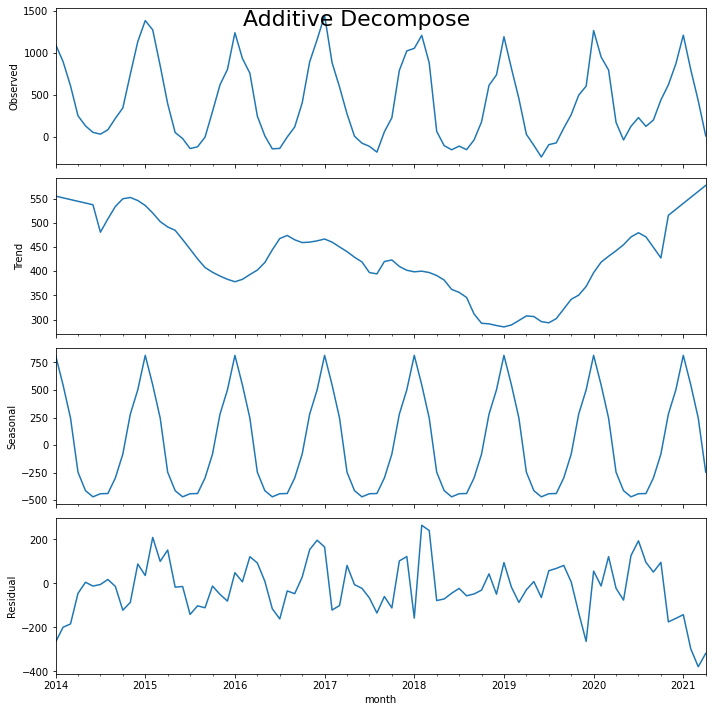

In [47]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_add_demand.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [48]:
des_demand = des_demand.reset_index()
des_demand['month'] = des_demand['month'].dt.to_period("M")
des_demand.columns = ['month', 'des_demand']

In [49]:
des_demand.index = des_demand['month']

In [50]:
demand.index = des_demand.index

In [51]:
des_demand['demand'] = demand['demand']

# **Data Summary**

In [150]:
data_season = pd.concat([des_heating[['des_heating', 'heating']], des_storage[['des_storage','storage']], des_demand[['des_demand', 'demand']]], axis =1)

In [151]:
data_season = data_season.dropna()

In [152]:
data_p = data_p.dropna()

In [153]:
data_season

,des_heating,heating,des_storage,storage,des_demand,demand
month,,,,,,
2014-01,112.136333,251.661667,61448.314207,68691.000,288.334359,1102.747692
2014-02,89.758708,191.655417,70578.293818,58677.000,352.489012,898.576923
2014-03,94.716456,165.501250,75730.837814,49656.000,364.027330,609.346154
2014-04,109.484086,109.102083,80780.065509,46999.000,499.223059,253.615385
2014-05,135.508462,71.290833,77124.449256,52790.000,546.123982,132.884615
...,...,...,...,...,...,...
2020-08,133.660994,26.067917,93277.231339,100794.186,566.492671,127.177594
2020-09,121.295249,38.826250,87429.251535,107954.830,500.820834,202.861537
2020-10,119.282031,101.838958,84745.235398,112281.744,522.992916,441.466063


In [154]:
data = pd.concat([data_p, data_season], axis =1)

In [155]:
data = data.dropna()

In [156]:
data

,ttf,brent,import_price_gas,coal_price,exchange_rate,des_heating,heating,des_storage,storage,des_demand,demand
month,,,,,,,,,,,
2014-02,24.006737,108.706111,11.3000,73.700000,1.365286,89.758708,191.655417,70578.293818,58677.000,352.489012,898.576923
2014-03,23.150048,107.857619,10.8800,75.800000,1.382566,94.716456,165.501250,75730.837814,49656.000,364.027330,609.346154
2014-04,20.649762,108.051905,10.7300,75.592857,1.380623,109.484086,109.102083,80780.065509,46999.000,499.223059,253.615385
2014-05,19.502909,109.219524,10.2000,75.559524,1.374598,135.508462,71.290833,77124.449256,52790.000,546.123982,132.884615
2014-06,17.533000,111.980476,9.7700,73.140476,1.359689,133.200103,31.794375,75129.993531,61207.000,525.338989,56.076923
...,...,...,...,...,...,...,...,...,...,...,...
2020-08,8.321619,44.969048,2.8619,50.078571,1.182762,133.660994,26.067917,93277.231339,100794.186,566.492671,127.177594
2020-09,11.495636,41.681500,3.9521,53.990476,1.179660,121.295249,38.826250,87429.251535,107954.830,500.820834,202.861537
2020-10,14.181091,41.525455,4.8896,56.556818,1.176977,119.282031,101.838958,84745.235398,112281.744,522.992916,441.466063


In [180]:
data.to_csv('full_data.csv')

In [184]:
files.download("full_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Testing Stationarity**

New data with exchange rates and WTI oil price.

In [9]:
data = pd.read_csv('full_data_new.csv')
del data['Unnamed: 0']

In [10]:
data.head()

,month,ttf,brent,coal_price,exchange_rate,des_heating,heating,des_storage,storage,WTI_oil
0,2014-02,24.006737,108.706111,73.700000,1.365286,89.758708,191.655417,705.782938,586.77,100.090500
1,2014-03,23.150048,107.857619,75.800000,1.382566,94.716456,165.501250,757.308378,496.56,99.840476
2,2014-04,20.649762,108.051905,75.592857,1.380623,109.484086,109.102083,807.800655,469.99,101.228095
3,2014-05,19.502909,109.219524,75.559524,1.374598,135.508462,71.290833,771.244493,527.90,101.047826
4,2014-06,17.533000,111.980476,73.140476,1.359689,133.200103,31.794375,751.299935,612.07,104.402857


In [7]:
from statsmodels.tsa.stattools import adfuller, acovf, acf, grangercausalitytests, coint
from statsmodels.graphics.tsaplots import plot_acf

In [12]:
def test_stationary(x):
  test = adfuller(x, regression = 'ct', autolag='AIC')

  alfa = test[4]
  print(f'ADF Statistic: {test[0]}')
  print(f'p-value: {test[1]}')
  if test[0] <= alfa['5%']:
    print('The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root')
  else:
    print("The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root")

In [13]:
for i in data.columns[1:]:
  print("--Variable--: " + i)
  test_stationary(data[i])
  print('  ')

--Variable--: ttf
ADF Statistic: -2.8447660199721656
p-value: 0.18098849137069267
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: brent
ADF Statistic: -2.7528247784138897
p-value: 0.21481002518388903
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: coal_price
ADF Statistic: -2.3207115146081203
p-value: 0.42252943626880934
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: exchange_rate
ADF Statistic: -2.4682024158057154
p-value: 0.34403790942392815
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: des_heating
ADF Statistic: -6.864891368793034
p-value: 2.849919392595926e-08
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
  
--Variable--: heating
ADF Statistic: -2.759456443730452
p-value: 

Johansen cointegration test is performed in Eviews

# **First Differences** 

In [14]:
data

,month,ttf,brent,coal_price,exchange_rate,des_heating,heating,des_storage,storage,WTI_oil
0,2014-02,24.006737,108.706111,73.700000,1.365286,89.758708,191.655417,705.782938,586.77000,100.090500
1,2014-03,23.150048,107.857619,75.800000,1.382566,94.716456,165.501250,757.308378,496.56000,99.840476
2,2014-04,20.649762,108.051905,75.592857,1.380623,109.484086,109.102083,807.800655,469.99000,101.228095
3,2014-05,19.502909,109.219524,75.559524,1.374598,135.508462,71.290833,771.244493,527.90000,101.047826
4,2014-06,17.533000,111.980476,73.140476,1.359689,133.200103,31.794375,751.299935,612.07000,104.402857
...,...,...,...,...,...,...,...,...,...,...
78,2020-08,8.321619,44.969048,50.078571,1.182762,133.660994,26.067917,932.772313,1007.94186,42.681905
79,2020-09,11.495636,41.681500,53.990476,1.179660,121.295249,38.826250,874.292515,1079.54830,39.926818
80,2020-10,14.181091,41.525455,56.556818,1.176977,119.282031,101.838958,847.452354,1122.81744,39.870909
81,2020-11,13.946333,43.478421,54.347500,1.182952,108.879249,164.028750,811.264824,1098.06650,41.797619


In [15]:
data1 = data.drop(['heating', 'storage'], axis =1)

In [16]:
data2 = data[['ttf', 'brent', 'coal_price', "exchange_rate",'des_storage','WTI_oil']]

In [18]:
data_diff = pd.concat([data['month'], data2.diff(),data['des_heating']], axis=1).dropna()


,month,ttf,brent,coal_price,exchange_rate,des_storage,WTI_oil,des_heating
1,2014-03,-0.856689,-0.848492,2.100000,0.017280,51.525440,-0.250024,94.716456
2,2014-04,-2.500286,0.194286,-0.207143,-0.001943,50.492277,1.387619,109.484086
3,2014-05,-1.146853,1.167619,-0.033333,-0.006025,-36.556163,-0.180269,135.508462
4,2014-06,-1.969909,2.760952,-2.419048,-0.014908,-19.944557,3.355031,133.200103
5,2014-07,-0.867652,-4.138095,1.568615,-0.004587,-24.247438,-2.965031,124.495491
...,...,...,...,...,...,...,...,...
78,2020-08,2.925967,1.768593,-0.219156,0.037287,-47.520704,1.754513,133.660994
79,2020-09,3.174017,-3.287548,3.911905,-0.003102,-58.479798,-2.755087,121.295249
80,2020-10,2.685455,-0.156045,2.566342,-0.002683,-26.840161,-0.055909,119.282031
81,2020-11,-0.234758,1.952967,-2.209318,0.005975,-36.187530,1.926710,108.879249


In [19]:
data_diff.columns = ['month','D_ttf','D_brent','D_coal','D_exchange_rate','D_des_storage','D_WTI','des_heating']
data_diff

,month,D_ttf,D_brent,D_coal,D_exchange_rate,D_des_storage,D_WTI,des_heating
1,2014-03,-0.856689,-0.848492,2.100000,0.017280,51.525440,-0.250024,94.716456
2,2014-04,-2.500286,0.194286,-0.207143,-0.001943,50.492277,1.387619,109.484086
3,2014-05,-1.146853,1.167619,-0.033333,-0.006025,-36.556163,-0.180269,135.508462
4,2014-06,-1.969909,2.760952,-2.419048,-0.014908,-19.944557,3.355031,133.200103
5,2014-07,-0.867652,-4.138095,1.568615,-0.004587,-24.247438,-2.965031,124.495491
...,...,...,...,...,...,...,...,...
78,2020-08,2.925967,1.768593,-0.219156,0.037287,-47.520704,1.754513,133.660994
79,2020-09,3.174017,-3.287548,3.911905,-0.003102,-58.479798,-2.755087,121.295249
80,2020-10,2.685455,-0.156045,2.566342,-0.002683,-26.840161,-0.055909,119.282031
81,2020-11,-0.234758,1.952967,-2.209318,0.005975,-36.187530,1.926710,108.879249


In [20]:
for i in data_diff.columns[1:]:
  test_stationary(data_diff[i])

ADF Statistic: -5.506034511413797
p-value: 2.242087443449445e-05
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
ADF Statistic: -5.580826987120643
p-value: 1.5919099169745452e-05
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
ADF Statistic: -6.630102300139725
p-value: 9.527743141840916e-08
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
ADF Statistic: -6.4049233149315805
p-value: 2.9796757076426887e-07
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
ADF Statistic: -7.559595683695507
p-value: 7.431049722337566e-10
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
ADF Statistic: -5.6954019039782695
p-value: 9.35745561347288e-06
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit 

In [21]:
data_diff.to_csv('data_diff.csv')

# **OLS regression**

## Correlation matrix

<AxesSubplot:>

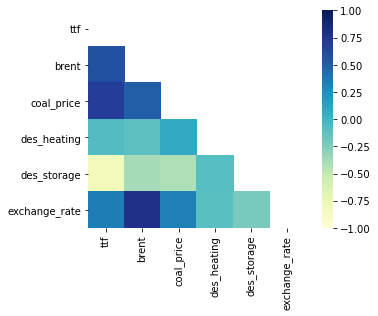

In [22]:
# create an array like the argument, but made of zeros
corrs = data[["ttf","brent","coal_price","des_heating","des_storage","exchange_rate"]].corr()
mask_corr = np.zeros_like(corrs)

# map True onto the upper triangle of the mask
mask_corr[np.triu_indices_from(mask_corr)] = True

#sns allows not to show the cells for which mask is true
sns.heatmap(corrs,vmin=-1,vmax=1,mask=mask_corr,cmap="YlGnBu",square=True)

## Normality check

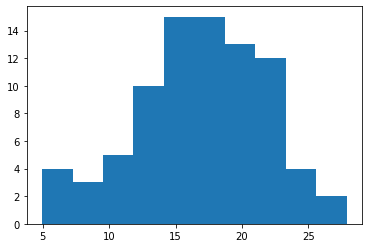

In [24]:
plt.hist(data["ttf"])
plt.show()

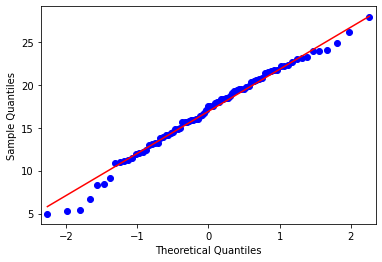

In [25]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data["ttf"], line='s')
plt.show()

Dummy for LNG need in Europe

In [26]:
data_diff['LNG_dummy'] = (data_diff["month"] >= "2016-9-01" ).astype(int)

,month,D_ttf,D_brent,D_coal,D_exchange_rate,D_des_storage,D_WTI,des_heating,LNG_dummy
1,2014-03,-0.856689,-0.848492,2.100000,0.017280,51.525440,-0.250024,94.716456,0
2,2014-04,-2.500286,0.194286,-0.207143,-0.001943,50.492277,1.387619,109.484086,0
3,2014-05,-1.146853,1.167619,-0.033333,-0.006025,-36.556163,-0.180269,135.508462,0
4,2014-06,-1.969909,2.760952,-2.419048,-0.014908,-19.944557,3.355031,133.200103,0
5,2014-07,-0.867652,-4.138095,1.568615,-0.004587,-24.247438,-2.965031,124.495491,0
...,...,...,...,...,...,...,...,...,...
78,2020-08,2.925967,1.768593,-0.219156,0.037287,-47.520704,1.754513,133.660994,1
79,2020-09,3.174017,-3.287548,3.911905,-0.003102,-58.479798,-2.755087,121.295249,1
80,2020-10,2.685455,-0.156045,2.566342,-0.002683,-26.840161,-0.055909,119.282031,1
81,2020-11,-0.234758,1.952967,-2.209318,0.005975,-36.187530,1.926710,108.879249,1


# Regression

In [ ]:
import statsmodels.api as sm

### Full model

In [42]:
X = sm.add_constant(data_diff[["D_brent","D_coal","D_des_storage","des_heating",'D_exchange_rate',"LNG_dummy"]])
model = sm.OLS(data_diff['D_ttf'],X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  D_ttf   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     12.08
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           1.87e-09
Time:                        17:43:45   Log-Likelihood:                -132.30
No. Observations:                  82   AIC:                             278.6
Df Residuals:                      75   BIC:                             295.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.7698      1.059     

Check the normality of residuals

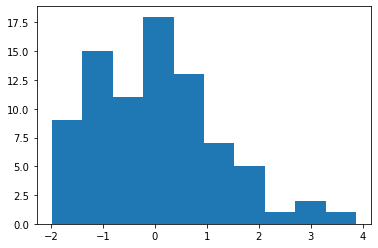

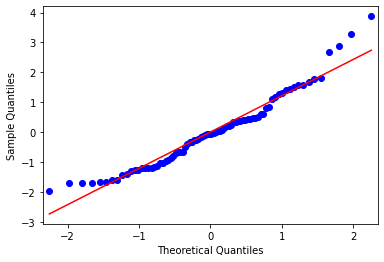

In [43]:
plt.hist(results.resid)
plt.show()

from statsmodels.graphics.gofplots import qqplot
qqplot(results.resid, line='s')
plt.show()

### Restricted model

In [29]:
X = sm.add_constant(data_diff[["D_brent","D_coal","D_des_storage","des_heating",'D_exchange_rate']])
model = sm.OLS(data_diff['D_ttf'],X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  D_ttf   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     13.60
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           1.78e-09
Time:                        17:33:08   Log-Likelihood:                -133.82
No. Observations:                  82   AIC:                             279.6
Df Residuals:                      76   BIC:                             294.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3450      1.041     

### Using WTI for oil price

In [30]:
X = sm.add_constant(data_diff[["D_WTI","D_coal","D_des_storage","des_heating",'D_exchange_rate','LNG_dummy']])
model = sm.OLS(data_diff['D_ttf'],X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  D_ttf   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     12.08
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           1.87e-09
Time:                        17:33:50   Log-Likelihood:                -132.30
No. Observations:                  82   AIC:                             278.6
Df Residuals:                      75   BIC:                             295.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.7691      1.059     

# **Granger Causality**

In [38]:
data_var = data_diff[['D_ttf','D_brent','D_coal','D_des_storage']]

In [40]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not granger cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data_var, variables = data_var.columns)

,D_ttf_x,D_brent_x,D_coal_x,D_des_storage_x
D_ttf_y,1.0000,0.0305,0.0001,0.0002
D_brent_y,0.0716,1.0000,0.0002,0.1535
D_coal_y,0.0062,0.1299,1.0000,0.0625
D_des_storage_y,0.0003,0.0002,0.0097,1.0000
